# Load Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import NeighborhoodComponentAnalysis
from sklearn.decomposition import PCA

# Reading unclean data

In [ ]:
d = pd.read_csv('D:\\ishan\\pythonproject\\Final project\\Insurence\\train2.csv', na_values = [-1])

missing values

In [ ]:
# missing values - ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_reg_03,ps_car_01_cat,ps_car_03_cat(411231),ps_car_05_cat(266551)
#ps_car_07_cat,ps_car_09_cat,ps_car_11,ps_car_14

co relation between interval variables

In [ ]:
col1 = ['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15']
l = len(internal_array[0])
for i in range (0,l):
    m = internal_array[0][i]
    n = internal_array[1][i]
    if not col1[m] == col1[n]:
        print((col1[m],col1[n])) # co relation between interval variables

 co relation between ordinal variables

In [ ]:
col2 = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_08_cat','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat']
l = len(ordinal_array[0])
for i in range (0,l):
    m = ordinal_array[0][i]
    n = ordinal_array[1][i]
    if not col2[m] == col2[n]:
        print((col2[m],col2[n])) # co relation between ordinal variables

In [ ]:
continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes == 'float64')].index

fig=plt.figure(figsize=(20,15))
for i in range(0,len(continuous)):
    ax=fig.add_subplot(6,10,i+1)
    sns.boxplot(y=df[continuous[i]])
    ax.set_title(df.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

Outliters detection
![alt text](https://drive.google.com/uc?export=view&id=1Fz5AzfF6cXRt53u-aZo50BpeBq0fwof4)

Corelation matrix

In [ ]:
corr_matrix = corr_matrix.iloc[:,:].astype(np.float64)
corr_matrix = pd.DataFrame(columns = data.columns , index = data.columns)
for i in range(0,59):
    #print(col[i])
    for j in range(0,59):
        #print(np.corrcoef(data.iloc[:,i:(i+1)],data.iloc[:,j:(j+1)],rowvar =0)[0][1])
        corr_matrix.iloc[j:(j+1),i:(i+1)]= np.corrcoef(data.iloc[:,i:(i+1)],data.iloc[:,j:(j+1)],rowvar =0)[0][1]

#Load file from Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Read Clean CSV 

---



1.   Imputed missing values
2.   Dropped two features with heighest missing data
3.   Treated Outliers
4.   Checked for duplicate data rows not present   



In [5]:
df = pd.read_csv(path+'/clean_data.csv')
df = df.drop('id', axis =1)

In [6]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1,0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1,0,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.890000,7.0,1,0,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1,0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1,0,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [8]:
df.shape

(595212, 56)

# Scaling - df

In [7]:
stdScaler = StandardScaler()
c = ['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_reg_02','ps_reg_03','ps_car_11','ps_car_13','ps_car_15','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14']

df.loc[:,c] = stdScaler.fit_transform(df.loc[:,c])

In [10]:
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0.050218,2.0,0.213594,1.0,0.0,0,1,0,0,0,0,0,0,-0.097621,1.043440,0,1,0,0.7,-0.591654,-0.560629,10.0,1,0,4,1.0,0,0.0,1,12,-0.415746,0.400000,0.313526,0.370810,0.737869,0.6,0.5,0.2,0.562038,-0.780567,1.731646,-1.417981,0.530322,-1.073849,-1.182124,1.525425,-0.367359,1.255372,0.167831,0,1,1,0,0,1
1,0,-0.453868,1.0,0.954362,0.0,0.0,0,0,1,0,0,0,0,0,-0.097621,-1.212598,0,0,1,0.8,-0.096928,-0.407047,11.0,1,0,11,1.0,1,2.0,1,19,0.785466,0.316228,-0.865800,0.388716,-0.842820,0.3,0.1,0.3,-0.333042,-0.780567,0.982196,1.409748,-0.839850,-1.073849,-0.493559,-1.046515,-0.367359,-1.104669,0.531911,0,1,1,0,1,0
2,0,1.562477,4.0,1.695130,1.0,0.0,0,0,1,0,0,0,0,0,-0.097621,1.325445,1,0,0,0.0,-1.086380,-0.010604,7.0,1,0,14,1.0,1,2.0,1,60,-1.616957,0.316228,-0.764418,0.347275,0.342818,0.5,0.7,0.1,-0.333042,0.100547,0.982196,-1.417981,-0.839850,-0.271891,-0.493559,-0.617858,0.463923,2.435393,-0.196249,0,1,1,0,1,0
3,0,-0.957955,1.0,-0.897559,0.0,0.0,1,0,0,0,0,0,0,0,-0.097621,0.197425,1,0,0,0.9,-0.591654,-0.999302,7.0,1,0,11,1.0,1,3.0,1,104,-1.616957,0.374166,-1.203608,0.294958,-1.457410,0.6,0.9,0.1,-0.333042,1.862777,-0.516705,-1.417981,-0.839850,1.332025,-2.214970,-1.475171,0.463923,0.665362,0.531911,0,0,0,0,0,0
4,0,-0.957955,2.0,-1.638327,1.0,0.0,1,0,0,0,0,0,0,0,-0.097621,0.479430,1,0,0,0.7,0.397799,-0.168133,11.0,1,0,14,1.0,1,2.0,1,82,0.785466,0.316070,-1.101721,0.365103,-1.457410,0.4,0.6,0.0,-0.333042,0.100547,-1.266155,-0.004117,0.530322,-0.271891,1.227851,-1.046515,-0.367359,-1.104669,-1.652569,0,0,0,1,1,0


In [11]:
#xx_train_data_smote = pd.DataFrame(xx_train_data_smote, columns = colx)
#yy_train_data_smote = pd.DataFrame(y_train_scaled_data, columns = ['target'])

# split in X and Y

In [6]:
X = df.iloc[:,1:]
Y = df.iloc[:, :1]

# Feature engineering

---

selecting top 20 cols

In [43]:
cols = ['target','ps_car_13','ps_ind_03','ps_car_14','ps_reg_03','ps_ind_05_cat','ps_reg_01','ps_ind_01','ps_ind_15','ps_car_01_cat','ps_car_11_cat','ps_car_09_cat','ps_ind_17_bin','ps_reg_02','ps_calc_14','ps_car_07_cat','ps_car_15','ps_car_06_cat','ps_car_11','ps_ind_06_bin','ps_calc_05','ps_calc_10','ps_car_12','ps_calc_06','ps_ind_16_bin','ps_calc_03','ps_ind_09_bin','ps_calc_11','ps_calc_04']#,'ps_calc_08','ps_calc_01','ps_car_04_cat','ps_calc_13','ps_ind_07_bin']
c = df.columns


In [44]:
for cc in c:
  if cc not in cols:
    df.drop(columns=cc, axis=1, inplace=True)

In [237]:
df.shape

(595212, 29)

# One Hot Encoding

In [78]:
c = ['ps_ind_04_cat','ps_ind_05_cat','ps_ind_02_cat','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat']

In [79]:
df_1hot = pd.get_dummies(df, columns= c)

In [80]:
df_1hot.shape

(595212, 112)

#Set 1-  Test/Train Data
---

for good "1" prediction- x_train, x_test, y_train, y_test

In [8]:
df_zeros = df[df.target == 0] 
df_ones = df[df.target == 1]
x_0 = df_zeros.iloc[:,1:]
x_1 = df_ones.iloc[:,1:]
y_0 = df_zeros.iloc[:,0:1]
y_1 = df_ones.iloc[:,0:1]

In [9]:
x_0_train, x_0_test, y_0_train, y_0_test = train_test_split(x_0, y_0, test_size=0.99, random_state=42)

In [10]:
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=0.5, random_state=42)

In [11]:
train_0 = pd.DataFrame(x_0_train)
train_0['target'] = y_0_train

In [12]:
train_1 = pd.DataFrame(x_1_train)
train_1['target'] = y_1_train

In [13]:
df_train = train_1.append(train_0)

In [14]:
test_0 = pd.DataFrame(x_0_test)
test_0['target'] = y_0_test

In [15]:
test_1 = pd.DataFrame(x_1_test)
test_1['target'] = y_1_test

In [16]:
df_test = test_1.append(test_0)

In [17]:
x_train = df_train.iloc[:,0:55]
y_train = df_train.iloc[:,55:]

In [18]:
x_test = df_test.iloc[:,0:55]
y_test = df_test.iloc[:,55:]

In [56]:
x_train = df_train.iloc[:,0:28]
y_train = df_train.iloc[:,28:]

In [57]:
x_test = df_test.iloc[:,0:28]
y_test = df_test.iloc[:,28:]

In [58]:
x_0_train.shape

(5735, 29)

In [59]:
y_train.head()

,target
311392,1
298463,1
422789,1
65658,1
8096,1


# Set 2 -Test Data/Train data(balanced)

---
 x_test, x_train, y_test, y_train


In [ ]:
# seperate 'o' and '1'

In [42]:
df_zeros = df[df.target == 0] 
df_ones = df[df.target == 1]

In [ ]:
# df_zeros_test, df_zeros_train


In [43]:
df_zeros.shape

(573518, 56)

In [44]:
from sklearn.utils import shuffle
df_zeros = shuffle(df_zeros)
df_zeros_train = df_zeros.iloc[:286759,:]
df_zeros_test = df_zeros.iloc[286759:,:]

In [18]:
df_zeros_train.shape

(286759, 56)

In [45]:
from sklearn.utils import shuffle
df_ones = shuffle(df_ones)
df_ones_train = df_ones.iloc[:10847,:]
df_ones_test = df_ones.iloc[10847:,:]

In [30]:
df_ones_test.shape

(10847, 56)

In [46]:

df_train = df_ones_train.append(df_zeros_train)
df_test = df_ones_test.append(df_zeros_test)

In [ ]:
df_train.head() #ok? -yes

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
187756,1,5,2.0,2,0.0,0.0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.5,0.6,1.211662,8.0,1,2,0,1.0,0,2.0,1,100,0.0,0.400000,1.002765,0.319374,3.741657,0.7,0.6,0.1,1,1,8,1,10,2,5,4,0,4,9,1,0,1,1,0,0
576894,1,5,2.0,1,0.0,0.0,0,0,0,1,0,0,0,0,0,7,1,0,0,0.6,0.6,0.932068,11.0,1,0,0,1.0,1,0.0,1,88,3.0,0.399875,0.649968,0.328938,2.236068,0.9,0.8,0.5,4,2,7,4,10,2,7,7,1,3,5,0,1,1,0,0,0
352285,1,0,3.0,6,1.0,0.0,0,0,1,0,0,0,0,0,0,10,0,0,0,0.6,0.9,1.042833,11.0,0,0,7,1.0,0,2.0,1,104,2.0,0.447214,1.219419,0.438406,3.741657,0.5,0.7,0.2,2,1,9,1,10,2,4,10,0,4,7,0,1,0,1,1,1
475404,1,3,1.0,4,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.3,0.741620,7.0,1,1,3,1.0,1,2.0,1,59,3.0,0.316228,0.715949,0.309677,3.464102,0.2,0.1,0.2,1,1,10,4,12,3,11,4,1,4,4,0,1,1,1,1,0
160883,1,2,1.0,1,1.0,0.0,0,0,0,1,0,0,0,0,0,10,0,0,1,0.9,0.6,1.054158,10.0,1,0,1,1.0,1,0.0,1,74,2.0,0.400000,0.805816,0.378418,3.464102,0.7,0.6,0.6,2,0,6,3,11,1,8,2,0,1,5,0,1,1,0,1,0


In [ ]:
# devide data into X and Y

In [47]:
x_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,:1]

In [48]:
x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,:1]

# data for Q8- x_test, x_train, y_test, y_train

In [ ]:
# seperate 'o' and '1'

In [54]:
df_zeros = df[df.target == 0] 
df_ones = df[df.target == 1]

In [ ]:
# df_zeros_test, df_zeros_train


In [ ]:
df_zeros.shape

(573518, 56)

In [55]:
from sklearn.utils import shuffle
df_zeros = shuffle(df_zeros)
df_zeros_train = df_zeros.iloc[:70000,:]
df_zeros_test = df_zeros.iloc[70000:,:]

In [ ]:
df_zeros_train.shape

(286759, 56)

In [56]:
from sklearn.utils import shuffle
df_ones = shuffle(df_ones)
df_ones_train = df_ones.iloc[:10847,:]
df_ones_test = df_ones.iloc[10847:,:]

In [ ]:
df_ones_test.shape

(10847, 56)

In [57]:

df_train = df_ones_train.append(df_zeros_train)
df_test = df_ones_test.append(df_zeros_test)

In [ ]:
df_train.head() #ok? -yes

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
187756,1,5,2.0,2,0.0,0.0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.5,0.6,1.211662,8.0,1,2,0,1.0,0,2.0,1,100,0.0,0.400000,1.002765,0.319374,3.741657,0.7,0.6,0.1,1,1,8,1,10,2,5,4,0,4,9,1,0,1,1,0,0
576894,1,5,2.0,1,0.0,0.0,0,0,0,1,0,0,0,0,0,7,1,0,0,0.6,0.6,0.932068,11.0,1,0,0,1.0,1,0.0,1,88,3.0,0.399875,0.649968,0.328938,2.236068,0.9,0.8,0.5,4,2,7,4,10,2,7,7,1,3,5,0,1,1,0,0,0
352285,1,0,3.0,6,1.0,0.0,0,0,1,0,0,0,0,0,0,10,0,0,0,0.6,0.9,1.042833,11.0,0,0,7,1.0,0,2.0,1,104,2.0,0.447214,1.219419,0.438406,3.741657,0.5,0.7,0.2,2,1,9,1,10,2,4,10,0,4,7,0,1,0,1,1,1
475404,1,3,1.0,4,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.3,0.741620,7.0,1,1,3,1.0,1,2.0,1,59,3.0,0.316228,0.715949,0.309677,3.464102,0.2,0.1,0.2,1,1,10,4,12,3,11,4,1,4,4,0,1,1,1,1,0
160883,1,2,1.0,1,1.0,0.0,0,0,0,1,0,0,0,0,0,10,0,0,1,0.9,0.6,1.054158,10.0,1,0,1,1.0,1,0.0,1,74,2.0,0.400000,0.805816,0.378418,3.464102,0.7,0.6,0.6,2,0,6,3,11,1,8,2,0,1,5,0,1,1,0,1,0


In [ ]:
# devide data into X and Y

In [58]:
x_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,:1]

In [59]:
x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,:1]

#Set 3 -Test Data/Train data(balanced)

---
1hot/ x_test, x_train, y_test, y_train


In [ ]:
# seperate 'o' and '1'

In [81]:
df_zeros = df_1hot[df_1hot.target == 0] 
df_ones = df_1hot[df_1hot.target == 1]

In [ ]:
# df_zeros_test, df_zeros_train


In [82]:
df_zeros.shape

(573518, 112)

In [83]:
from sklearn.utils import shuffle
df_zeros = shuffle(df_zeros)
df_zeros_train = df_zeros.iloc[:5500,:]
df_zeros_test = df_zeros.iloc[5500:,:]

In [84]:
df_zeros_train.shape

(5500, 112)

In [85]:
from sklearn.utils import shuffle
df_ones = shuffle(df_ones)
df_ones_train = df_ones.iloc[:10847,:]
df_ones_test = df_ones.iloc[10847:,:]

In [86]:
df_ones_test.shape

(10847, 112)

In [87]:

df_train = df_ones_train.append(df_zeros_train)
df_test = df_ones_test.append(df_zeros_test)

In [88]:
df_train.head() #ok? -yes

,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,...,ps_car_04_cat_0,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_0,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0.0,ps_car_07_cat_1.0,ps_car_08_cat_0,ps_car_08_cat_1,ps_car_09_cat_0.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_0,ps_car_10_cat_1,ps_car_10_cat_2
168250,1,4,2,0,1,0,0,0,0,0,0,0,10,1,0,0,0.9,0.8,1.206493,22,1.0,0.316228,0.715646,0.374566,3.162278,0.9,0.3,0.7,1,3,9,2,9,0,10,6,1,3,6,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
158346,1,3,4,0,0,1,0,0,0,0,0,0,3,0,0,1,0.9,0.3,0.669421,64,3.0,0.316228,0.609413,0.361939,2.828427,0.1,0.1,0.2,1,3,4,2,7,2,9,3,1,4,7,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
45015,1,5,7,1,0,0,0,0,0,0,0,0,6,1,0,0,0.1,0.2,0.890000,100,0.0,0.399750,0.768988,0.319374,3.464102,0.9,0.0,0.6,1,2,8,2,10,3,12,6,1,2,5,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
238179,1,1,7,0,1,0,0,0,0,0,0,0,3,1,0,0,0.1,0.2,0.890000,52,3.0,0.374166,0.709266,0.359861,3.464102,0.1,0.5,0.4,2,1,8,5,7,1,11,10,0,3,9,1,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
218482,1,0,1,1,0,0,0,0,0,0,0,0,3,1,0,0,0.6,0.1,0.890000,22,3.0,0.316228,0.766229,0.374566,3.316625,0.4,0.3,0.5,4,1,6,5,11,4,9,5,1,4,7,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
# devide data into X and Y

In [89]:
x_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,:1]

In [90]:
x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,:1]

# SMOTE and Upsample Code

---
for scenario to predict "1" better/ x_train_smote, y_train_smote


In [ ]:
over = SMOTE(sampling_strategy=0.8) 
x_train_smote , y_train_smote = over.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [66]:
#over_l = SMOTE(sampling_strategy=0.3) # lets do magic now
#x_train_data_smote, y_train_data_smote = over_l.fit_sample(x_train_data, y_train_data)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42,sampling_strategy=0.39)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)
#x_train_data_smote, y_train_data_smote = x_train_data, y_train_data

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [67]:
colx = x_train.columns
x_train_smote = pd.DataFrame(x_train_smote, columns=colx)

In [68]:
y_train_smote = pd.DataFrame(y_train_smote, columns =['target'])

In [63]:
new_data = y_train_smote.join(x_train_smote)

In [69]:
df_0 = new_data[new_data.target == 0]
df_1 = new_data[new_data.target == 1]

In [70]:
print(df_0.shape)
print(df_1.shape)

(70000, 56)
(26250, 56)


In [71]:
x_train = x_train_smote
y_train = y_train_smote

# duplicate more 1s

In [ ]:
xtra = x_1_train.iloc[:5000,:55]
ytra = y_1_train.iloc[:5000,:]

In [ ]:
x_train = x_train.append(xtra)
y_train = y_train.append(ytra)

In [ ]:
ytra.head()

,target
311392,1
298463,1
422789,1
65658,1
8096,1


# PCA - x_train, x_test

In [ ]:
pca = PCA(n_components = 30)

In [ ]:
x_train = pca.fit_transform(x_train)

In [ ]:
x_test = pca.fit_transform(x_test)

# Grid Search for multiplr algorithm!

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
n_layer_sizes=(100,100,150),activation= 'relu', max_iter=5000, solver='sgd', verbose=True,  random_state=21,tol=0.001, learning_rate_init=0.03

In [ ]:
weights = np.linspace(0.3, 0.8, 5)
gsc = GridSearchCV(
    estimator=LinearSVC(dual = False),
    param_grid={
     
      'penalty' :['l2'],
      'loss': ['squared_hinge'],
      'max_iter' :[200,500,1000]

    },
    scoring='f1',
    cv=3
)

grid_result = gsc.fit(x_train, y_train)
print("Best parameters : %s" % grid_result.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best parameters : {'loss': 'squared_hinge', 'max_iter': 200, 'penalty': 'l2'}


# Logistics regression

In [38]:
lr = LogisticRegression() # use class weight after grid search

In [60]:
parameters = lr.fit(x_train,y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
y_pred_lr = lr.predict(x_test)

In [62]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_lr), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,46884,520899
actual 1,375,10472


In [63]:
print(metrics.classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.08      0.15    567783
           1       0.02      0.97      0.04     10847

    accuracy                           0.10    578630
   macro avg       0.51      0.52      0.10    578630
weighted avg       0.97      0.10      0.15    578630



In [ ]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

# SVM

In [20]:
from sklearn.svm import LinearSVC

In [76]:
svm = LinearSVC(max_iter=200,dual=True,)

In [77]:
svm.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=200,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [78]:
y_pred_svm = svm.predict(x_test)

In [79]:
print(metrics.classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    503518
           1       0.04      0.06      0.05     10847

    accuracy                           0.95    514365
   macro avg       0.51      0.52      0.51    514365
weighted avg       0.96      0.95      0.96    514365



In [80]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_svm), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,489646,13872
actual 1,10210,637


# **XG Boost**


In [64]:
from xgboost.sklearn import XGBClassifier #class_weight= {0: 0.3, 1: 0.7},

In [91]:
XG  = XGBClassifier( n_estimators = 100, scale_pos_weight= 1,class_weight= {0: 0.3, 1: 0.7})
XG.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 0.3, 1: 0.7},
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:
y_pred_XG =XG.predict(x_test)

In [94]:
print(metrics.classification_report(y_test,y_pred_XG))

              precision    recall  f1-score   support

           0       0.99      0.10      0.18    568018
           1       0.02      0.96      0.04     10847

    accuracy                           0.11    578865
   macro avg       0.51      0.53      0.11    578865
weighted avg       0.97      0.11      0.18    578865



In [69]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_XG), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,67328,500455
actual 1,583,10264


In [128]:
proba = XG.predict_proba(x_test)
proba = proba[:,0]

In [135]:
y_proba = np.where((proba <= 0.50),1,0)

In [136]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_proba), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,371654,190394
actual 1,5281,5566


# **Ada boost**

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
clf = AdaBoostClassifier(n_estimators=300, random_state=42)

In [72]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=300, random_state=42)

In [73]:
y_pred = clf.predict(x_test)

In [74]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,97194,470589
actual 1,931,9916


In [75]:
print(metrics.classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.17      0.29    567783
           1       0.02      0.91      0.04     10847

    accuracy                           0.19    578630
   macro avg       0.51      0.54      0.17    578630
weighted avg       0.97      0.19      0.29    578630



In [ ]:
prob = clf.predict_proba(x_test)
y_prob = prob[:,1]

In [ ]:
y_prob = np.where((y_prob <= 0.5),1,0)

In [ ]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_proba), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,284502,2257
actual 1,10632,215


# **Random Forest**

In [146]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100,  )#class_weight= {0: 0.3, 1: 0.7}

In [ ]:
#con_metric = pd.DataFrame(metrics.confusion_matrix(y_test_m,y_pred_RF), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

In [147]:
clfRF.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
y_pred_RF=clfRF.predict(x_test) # zFP- ac= 1 pred- 0

In [149]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_RF), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,362604,199444
actual 1,5310,5537


In [150]:
print(metrics.classification_report(y_test,y_pred_RF.round()))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78    562048
           1       0.03      0.51      0.05     10847

    accuracy                           0.64    572895
   macro avg       0.51      0.58      0.42    572895
weighted avg       0.97      0.64      0.77    572895



# Keras

In [151]:
import keras

Using TensorFlow backend.


In [30]:
# find input dimentions - number of features in x

x_train_smote.shape[1]

55

In [152]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

In [153]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [154]:
# define the keras model
model = Sequential()
model.add(Dense(224, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(448, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [155]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [156]:
model.fit(x_train,y_train, epochs=50, batch_size=500)

Epoch 1/50
22317/22317 [==============================] - 2s 97us/step - loss: 0.9427 - accuracy: 0.5115
Epoch 2/50
22317/22317 [==============================] - 2s 77us/step - loss: 0.6858 - accuracy: 0.5584
Epoch 3/50
22317/22317 [==============================] - 2s 77us/step - loss: 0.6785 - accuracy: 0.5738
Epoch 4/50
22317/22317 [==============================] - 2s 77us/step - loss: 0.6733 - accuracy: 0.5847
Epoch 5/50
22317/22317 [==============================] - 2s 77us/step - loss: 0.6710 - accuracy: 0.5860
Epoch 6/50
22317/22317 [==============================] - 2s 80us/step - loss: 0.6705 - accuracy: 0.5885
Epoch 7/50
22317/22317 [==============================] - 2s 80us/step - loss: 0.6671 - accuracy: 0.5895
Epoch 8/50
22317/22317 [==============================] - 2s 81us/step - loss: 0.6651 - accuracy: 0.5959
Epoch 9/50
22317/22317 [==============================] - 2s 81us/step - loss: 0.6646 - accuracy: 0.5945
Epoch 10/50
22317/22317 [==============================

In [157]:
y_pred_keras = model.predict_classes(x_test)

In [158]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_keras), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,388788,173260
actual 1,6257,4590


In [132]:
print(metrics.classification_report(y_test,y_pred_keras.round()))

              precision    recall  f1-score   support

           0       0.98      0.55      0.70    562048
           1       0.02      0.53      0.04     10847

    accuracy                           0.55    572895
   macro avg       0.50      0.54      0.37    572895
weighted avg       0.97      0.55      0.69    572895



# **Artificial** **Neural** **Network**

In [159]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 150), 'learning_rate': 'adaptive', 'solver': 'sgd'}

In [161]:
NN = MLPClassifier(hidden_layer_sizes=(50,100,150),activation= 'relu', max_iter=5000, alpha=0.05,solver='sgd', verbose=True,  random_state=21,tol=0.001, learning_rate='adaptive')

In [162]:
NN.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.73888848
Iteration 2, loss = 0.72248190
Iteration 3, loss = 0.71795852
Iteration 4, loss = 0.71515573
Iteration 5, loss = 0.71358078
Iteration 6, loss = 0.71170186
Iteration 7, loss = 0.70963291
Iteration 8, loss = 0.70942654
Iteration 9, loss = 0.70719452
Iteration 10, loss = 0.70771591
Iteration 11, loss = 0.70791635
Iteration 12, loss = 0.70605080
Iteration 13, loss = 0.70569312
Iteration 14, loss = 0.70607486
Iteration 15, loss = 0.70448594
Iteration 16, loss = 0.70571788
Iteration 17, loss = 0.70356282
Iteration 18, loss = 0.70284388
Iteration 19, loss = 0.70324248
Iteration 20, loss = 0.70292225
Iteration 21, loss = 0.70262231
Iteration 22, loss = 0.70214038
Iteration 23, loss = 0.70259666
Iteration 24, loss = 0.70265119
Iteration 25, loss = 0.70153972
Iteration 26, loss = 0.70209609
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 27, loss = 0.69909626
Iteration 28, loss = 0.69894348

MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 150), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=21, shuffle=True, solver='sgd',
              tol=0.001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [163]:
y_pred_NN = NN.predict(x_test)

In [164]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_NN), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,376582,185466
actual 1,5620,5227


In [172]:
print(metrics.classification_report(y_test,y_pred_NN.round()))

              precision    recall  f1-score   support

           0       0.99      0.04      0.08    567783
           1       0.02      0.98      0.04     10847

    accuracy                           0.06    578630
   macro avg       0.50      0.51      0.06    578630
weighted avg       0.97      0.06      0.08    578630



# LightGBM

In [203]:
from lightgbm import LGBMClassifier, plot_importance
import xgboost as xgb

In [243]:
#class_weight_lgb={0: 0.5, 1: 0.7}
lgb = LGBMClassifier(n_estimators=100,max_depth=7,learning_rate=0.01,random_state=42)
lgb.fit(x_train,y_train)
y_pred_light = lgb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_light))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.99      0.69      0.81    562048
           1       0.03      0.48      0.05     10847

    accuracy                           0.68    572895
   macro avg       0.51      0.58      0.43    572895
weighted avg       0.97      0.68      0.79    572895



In [244]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_light), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,385353,176695
actual 1,5688,5159


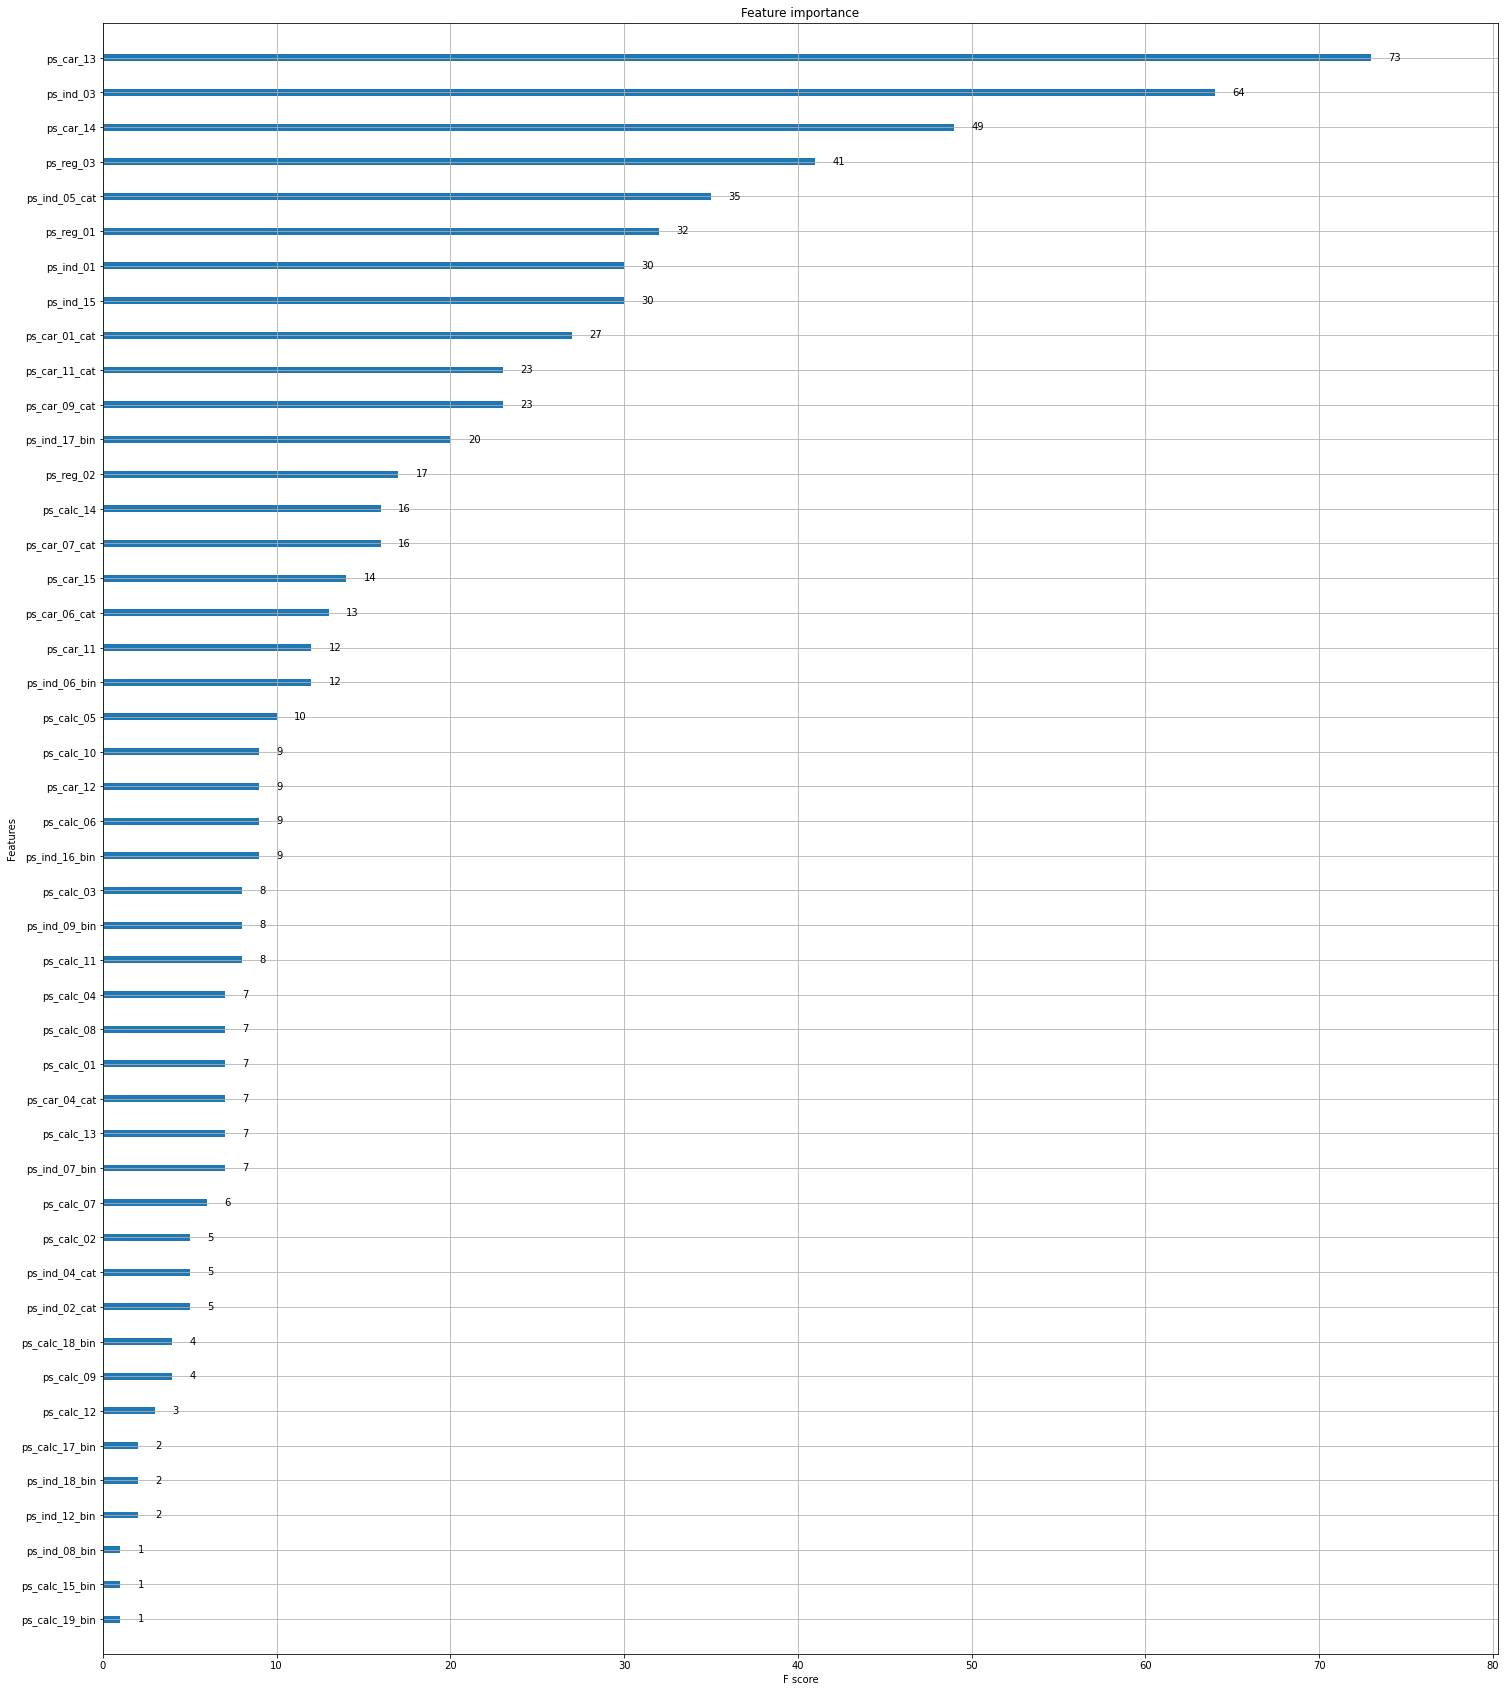

In [54]:
xgb.plot_importance(XG)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

In [ ]:
df.ps_calc_19_bin, df.ps_calc_15_bin,df.ps_ind_08_bin,df.ps_calc_17_bin,df.ps_calc_12, df.ps_ind_18_bin,df.ps_calc_09,df.ps_calc_18_bin, df.ps_ind_02_cat,df.ps_ind_04_cat, df.ps_calc_02,df.ps_calc_07,df.ps_ind_07_bin, df.ps_calc_13,

# catboost

In [107]:
#pip install catboost

In [108]:
from catboost import CatBoostClassifier

In [111]:
#class_weight_cb=[0.5, 0.6]
cb = CatBoostClassifier(iterations=100,learning_rate=0.001,  depth=5,eval_metric='F1')
# Fit model
cb.fit(x_train,y_train)
y_pred_cat = cb.predict(x_test)
print(metrics.classification_report(y_test,y_pred_cat))

0:	learn: 0.4848974	total: 13.7ms	remaining: 1.36s
1:	learn: 0.5254982	total: 28.3ms	remaining: 1.39s
2:	learn: 0.5216226	total: 41.6ms	remaining: 1.34s
3:	learn: 0.5258101	total: 55.5ms	remaining: 1.33s
4:	learn: 0.5243177	total: 69.7ms	remaining: 1.32s
5:	learn: 0.5313593	total: 83.6ms	remaining: 1.31s
6:	learn: 0.5405432	total: 96.8ms	remaining: 1.29s
7:	learn: 0.5433872	total: 111ms	remaining: 1.27s
8:	learn: 0.5424016	total: 124ms	remaining: 1.25s
9:	learn: 0.5421957	total: 138ms	remaining: 1.25s
10:	learn: 0.5457147	total: 152ms	remaining: 1.23s
11:	learn: 0.5445535	total: 165ms	remaining: 1.21s
12:	learn: 0.5414210	total: 179ms	remaining: 1.19s
13:	learn: 0.5413444	total: 192ms	remaining: 1.18s
14:	learn: 0.5430022	total: 204ms	remaining: 1.16s
15:	learn: 0.5404166	total: 222ms	remaining: 1.16s
16:	learn: 0.5440621	total: 235ms	remaining: 1.15s
17:	learn: 0.5443975	total: 249ms	remaining: 1.13s
18:	learn: 0.5437838	total: 262ms	remaining: 1.11s
19:	learn: 0.5418077	total: 276ms	

In [112]:
con_metric = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_cat), index = ['acctual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
con_metric

,predicted 0,predicted 1
acctual 0,370696,191352
actual 1,5500,5347
